# Elastic Net回归

我们展示如何使用TensorFlow来求解elastic net回归问题。

$y = Ax + b$

我们使用iris数据集：

```
#  y = Sepal Length
#  x = Pedal Length, Petal Width, Sepal Width
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

/home/zhangxin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 设置TensorFlow

In [2]:
ops.reset_default_graph()

# 创建计算图
sess = tf.Session()

## 获取数据

In [3]:
# 加载数据
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

## 设置模型

In [4]:
# 设置随机种子
seed = 13
np.random.seed(seed)
tf.set_random_seed(seed)

# 声明批尺寸
batch_size = 50

# 初始化占位符
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 变量
A = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 声明模型运算
model_output = tf.add(tf.matmul(x_data, A), b)

# 声明elastic net损失函数（包含对A的1范数约束和2范数约束）
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), 
                                    e1_term), e2_term), 0)

# 声明优化器
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

## 训练模型

In [5]:
# 初始化变量
init = tf.global_variables_initializer()
sess.run(init)

# 迭代优化
loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1)%250==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #250 A = [[1.2601463]
 [0.4016138]
 [0.4015912]] b = [[-0.14889473]]
Loss = [1.5918858]
Step #500 A = [[1.1789725 ]
 [0.46715766]
 [0.2989632 ]] b = [[-0.06771808]]
Loss = [1.4631484]
Step #750 A = [[1.1341658 ]
 [0.518997  ]
 [0.21090421]] b = [[0.01904624]]
Loss = [1.3715785]
Step #1000 A = [[1.0974511]
 [0.5460409]
 [0.1310238]] b = [[0.10402211]]
Loss = [1.2777476]


## 得到模型求解结果

In [6]:
# 得到最优系数
[[sw_coef], [pl_coef], [pw_ceof]] = sess.run(A)
[y_intercept] = sess.run(b)

## 打印结果

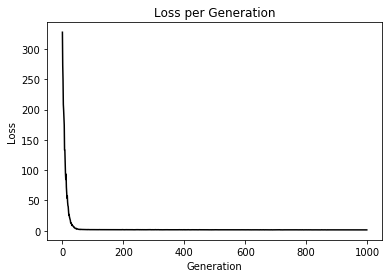

In [7]:
# 打印损失值变化情况
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()